# MLP 모델로 이미지 분류해보기

### MNIST 데이터 살펴보기

In [ ]:
import sys
import tensorflow as tf
import numpy as np

In [ ]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


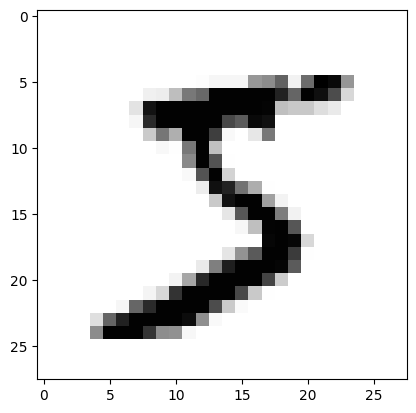

In [ ]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [ ]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### MLP 구조 만들기

In [ ]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

###  MLP 모델 Training 하기

In [ ]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 7s 133ms/step - loss: 13.7373 - categorical_accuracy: 0.7997 - val_loss: 1.3614 - val_categorical_accuracy: 0.9171
Epoch 2/30
48/48 [==============================] - 8s 165ms/step - loss: 0.8837 - categorical_accuracy: 0.9317 - val_loss: 0.7736 - val_categorical_accuracy: 0.9343
Epoch 3/30
48/48 [==============================] - 8s 157ms/step - loss: 0.4069 - categorical_accuracy: 0.9537 - val_loss: 0.6152 - val_categorical_accuracy: 0.9438
Epoch 4/30
48/48 [==============================] - 4s 87ms/step - loss: 0.2103 - categorical_accuracy: 0.9700 - val_loss: 0.5677 - val_categorical_accuracy: 0.9447
Epoch 5/30
48/48 [==============================] - 4s 74ms/step - loss: 0.1135 - categorical_accuracy: 0.9794 - val_loss: 0.5409 - val_categorical_accuracy: 0.9482
Epoch 6/30
48/48 [==============================] - 4s 86ms/step - loss: 0.0601 - categorical_accuracy: 0.9871 - val_loss: 0.5230 - val_categorical_accuracy: 0.9486
Epoch 

In [ ]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[13.737290382385254, 0.8836786150932312, 0.40692347288131714, 0.21028921008110046, 0.1135021224617958, 0.06006154790520668, 0.028233153745532036, 0.014682632870972157, 0.00666585611179471, 0.002569478238001466, 0.0009501778986304998, 0.000533321057446301, 0.00032537264632992446, 0.000258564978139475, 0.00023094232892617583, 0.00021026002650614828, 0.00019222928676754236, 0.00017879386723507196, 0.00016644533025100827, 0.000156581518240273, 0.00014584403834305704, 0.00013804336776956916, 0.00013095265603624284, 0.0001239756093127653, 0.00011824693501694128, 0.00011228171206312254, 0.00010661936539690942, 0.00010203915735473856, 9.746286377776414e-05, 9.329568274552003e-05]


In [ ]:
# Validation loss 확인하기
val_loss = history.history['val_loss']
print(val_loss)


[1.3614314794540405, 0.7735538482666016, 0.6152148246765137, 0.5676648616790771, 0.5409340858459473, 0.5230289101600647, 0.507716953754425, 0.5034560561180115, 0.49819234013557434, 0.4828190207481384, 0.4837685525417328, 0.4811844825744629, 0.4810079336166382, 0.4809841215610504, 0.48102015256881714, 0.4807317852973938, 0.48097509145736694, 0.4805600047111511, 0.48098474740982056, 0.4805346727371216, 0.4806789457798004, 0.4804920554161072, 0.48046717047691345, 0.48045334219932556, 0.4804045855998993, 0.4803396463394165, 0.4803127348423004, 0.48022526502609253, 0.4803319573402405, 0.48006922006607056]


## 학습된 모델의 성능 확인하기

In [ ]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4374 - categorical_accuracy: 0.9563

 Test Accuracy: 0.9563


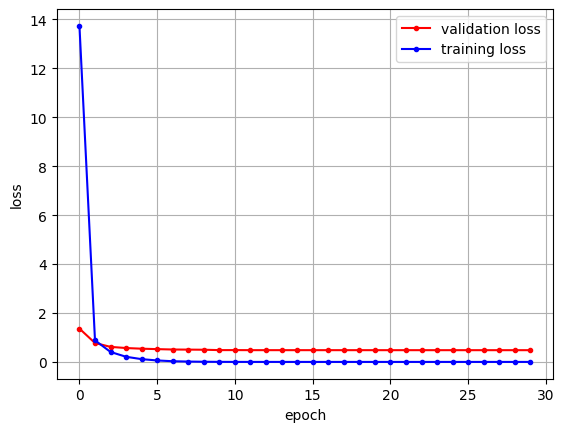

In [ ]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 2-3. MLP 모델의 한계

## MLP 모델의 한계를 코드로 확인하기

### 원본 데이터를 변형해서 MLP 구조의 성능 테스트하기

In [ ]:
# OpenCV 모듈 불러오기
import cv2

In [ ]:
# 다시 한번 MNIST 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

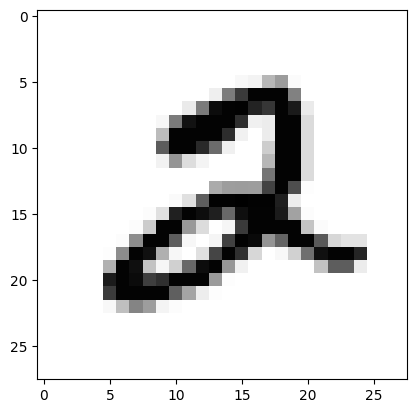

In [ ]:
plt.imshow(X_train[5], cmap='Greys')

In [ ]:
# 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

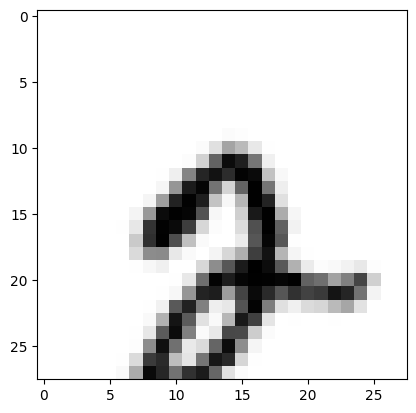

In [ ]:
plt.imshow(test_image, cmap='Greys')

In [ ]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [ ]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 117ms/step


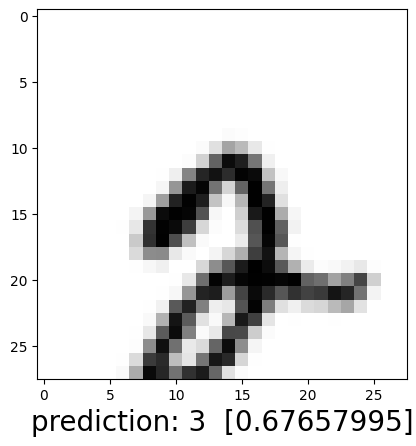

In [ ]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

## 어떻게 이미지 데이터를 MLP에 적용할까?

아래 이미지는 손글씨 숫자 이미지를 분류하는 태스크를 수행할 때 사용하는 데이터셋인 MNIST Dataset의 일부입니다. 28 x 28 사이즈 784 pixel의 2D 이미지를 MLP에 적용하기 위해서는 2차원 데이터를 1차원 구조로 변경시켜야 합니다. 각각의 열의 값을 1차원의 값(28개의 노드)으로 만들어 줍니다. 1열부터 28열까지 동일한 과정을 진행하면 784개의 값이 MLP에 들어갑니다.

<img src="https://drive.google.com/uc?id=1LWRbxHxvZbOpB8TKPhg__wtUEL3Sw_0n">


##이미지 데이터와 MLP 구조의 불합치

2차원 이미지(고양이)를 1차원 구조로 바꾸면 고양이라고 할 수 있을까요?

하나의 픽셀의 의미는 주변 픽셀과의 관계를 통해서 결정되기 때문에 2차원 이미지를 1차원 구조로 바꾸면 숨겨져 있던 패턴 정보가 사라집니다. 따라서 CV 분야에서는 MLP 구조를 사용하는 것은 좋지 않습니다.

<img src ="https://drive.google.com/uc?id=1JuG50DtanVX57RUDob-s_-dhXCFv2Btf">
